<a href="https://colab.research.google.com/github/sruthidamera/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

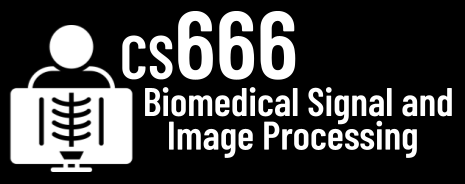
#Assignment 5

In [ ]:
# NAME: Sruthi Damera

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.2 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [ ]:
import requests

url = "https://cs666.org/data/ct.zip"
response = requests.get(url)

with open("ct.zip", "wb") as file:
    file.write(response.content)

In [ ]:
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [ ]:
# TODO: 220 slicers

In [ ]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

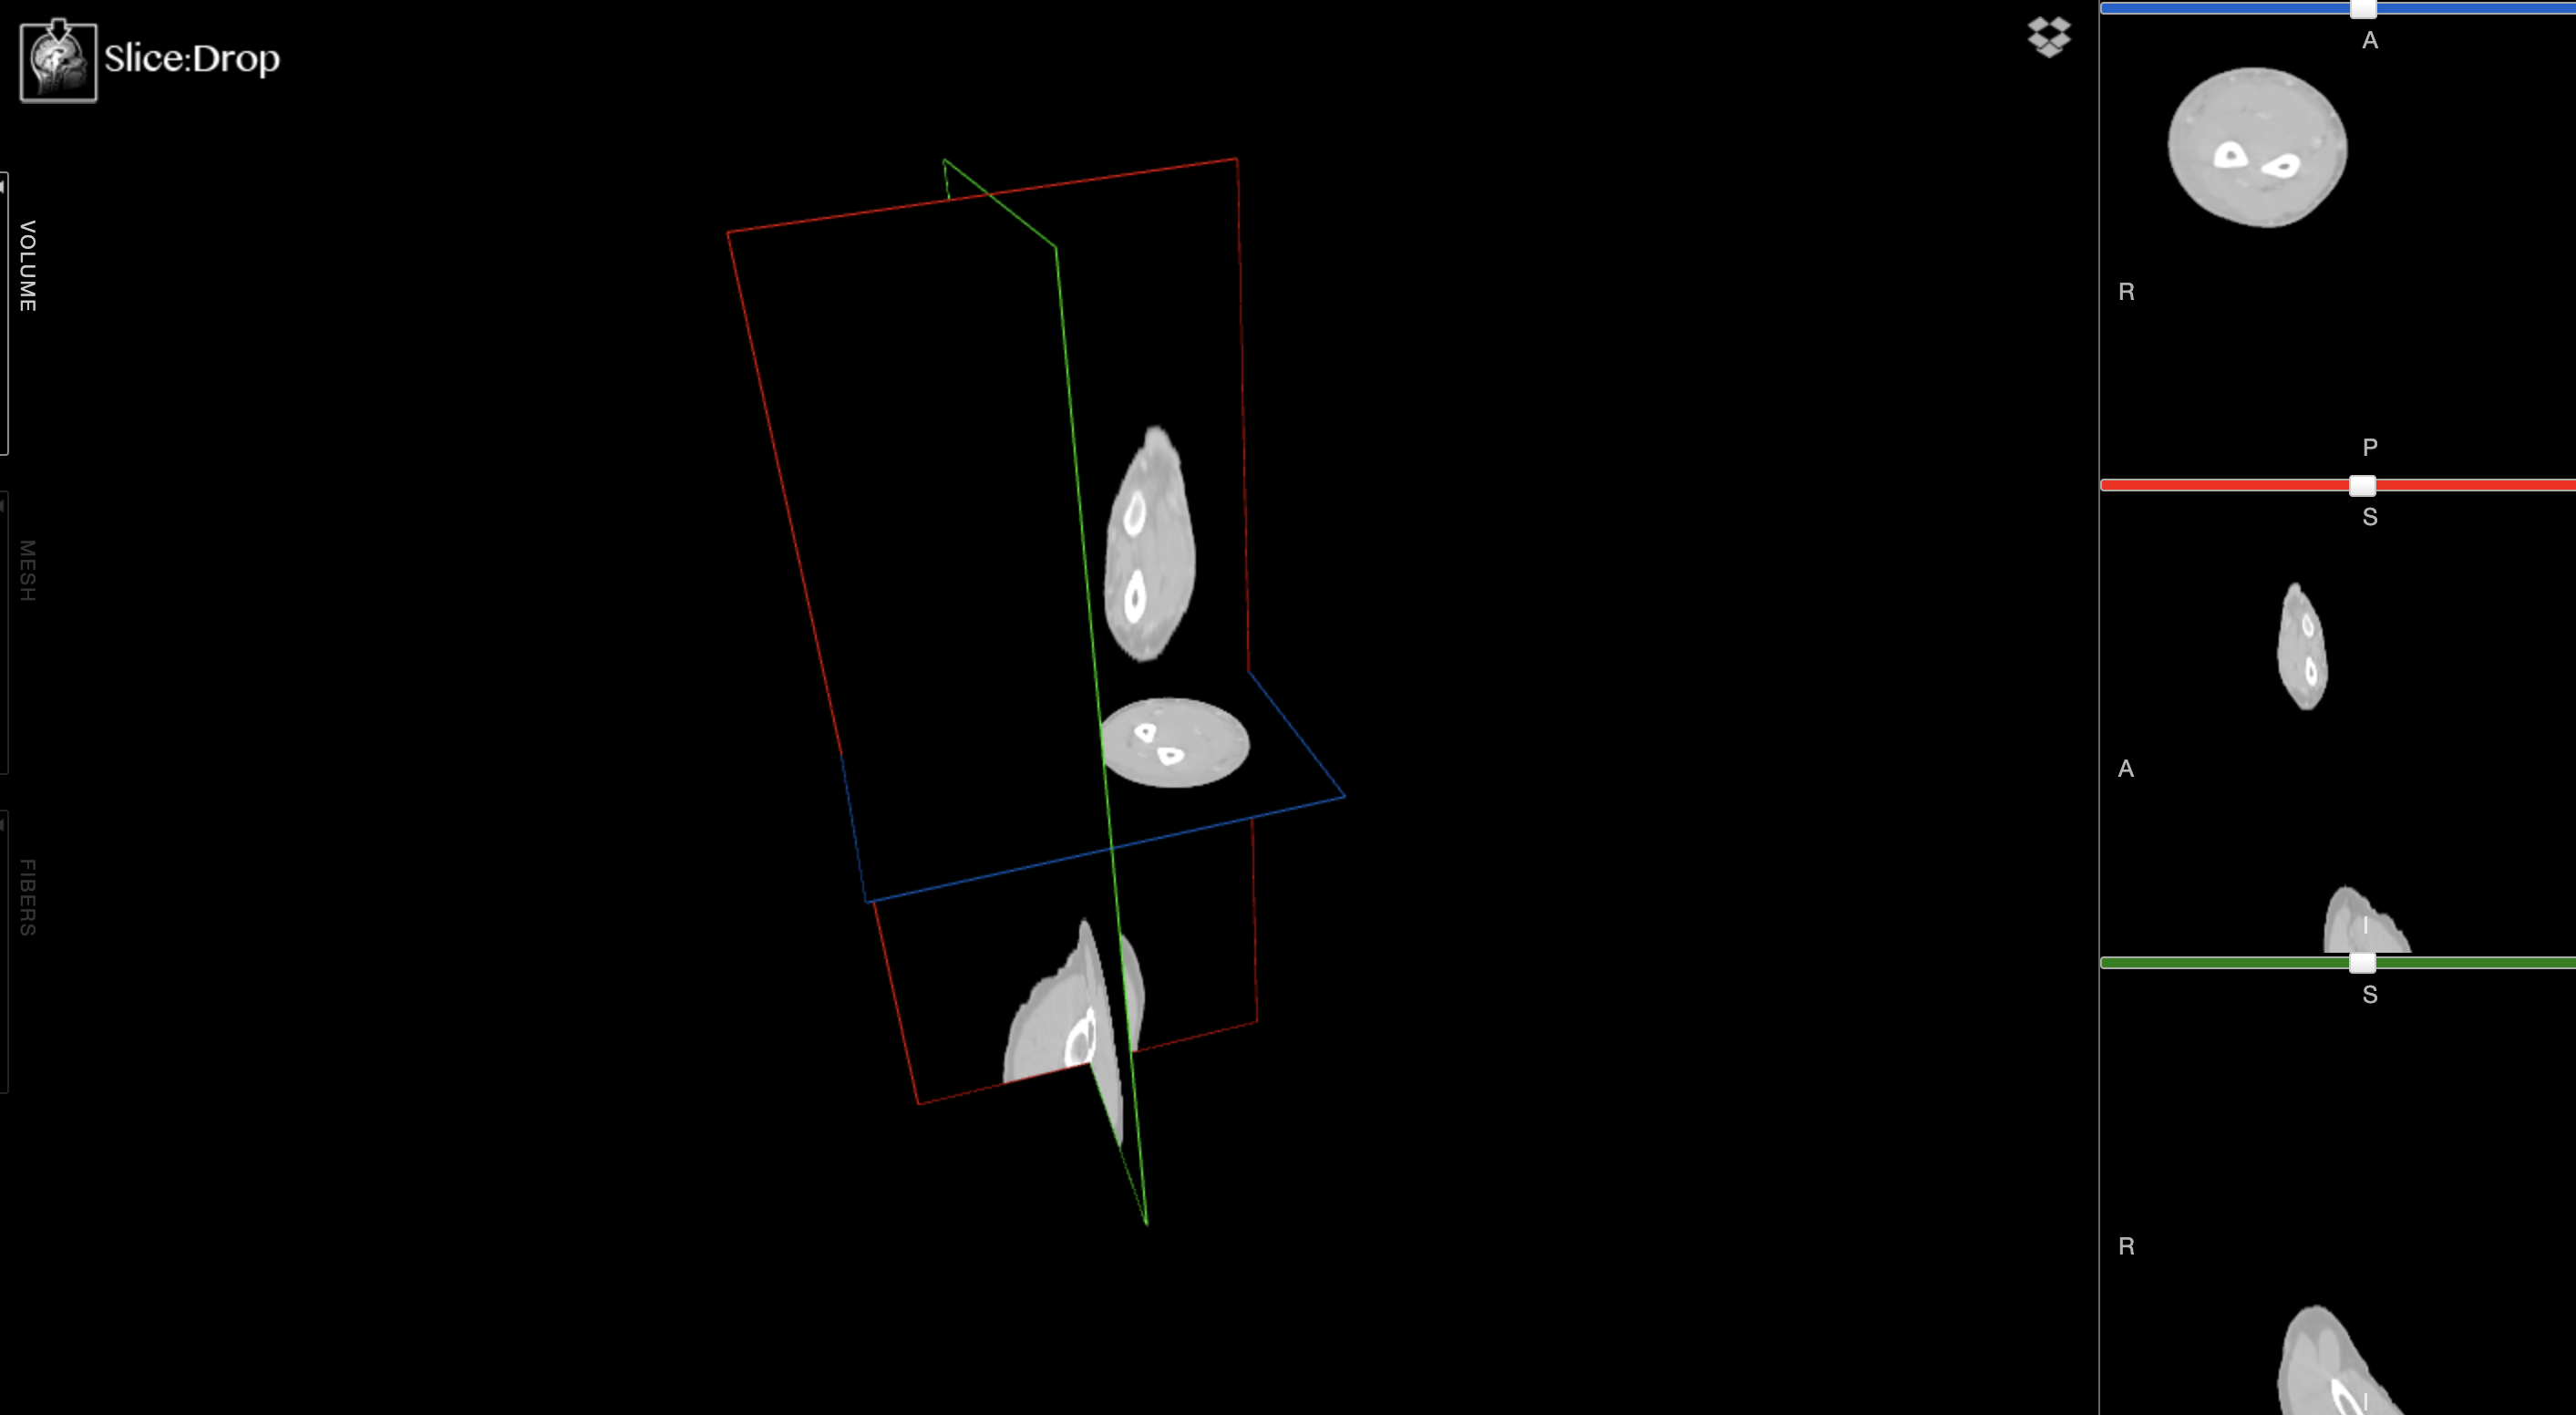

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

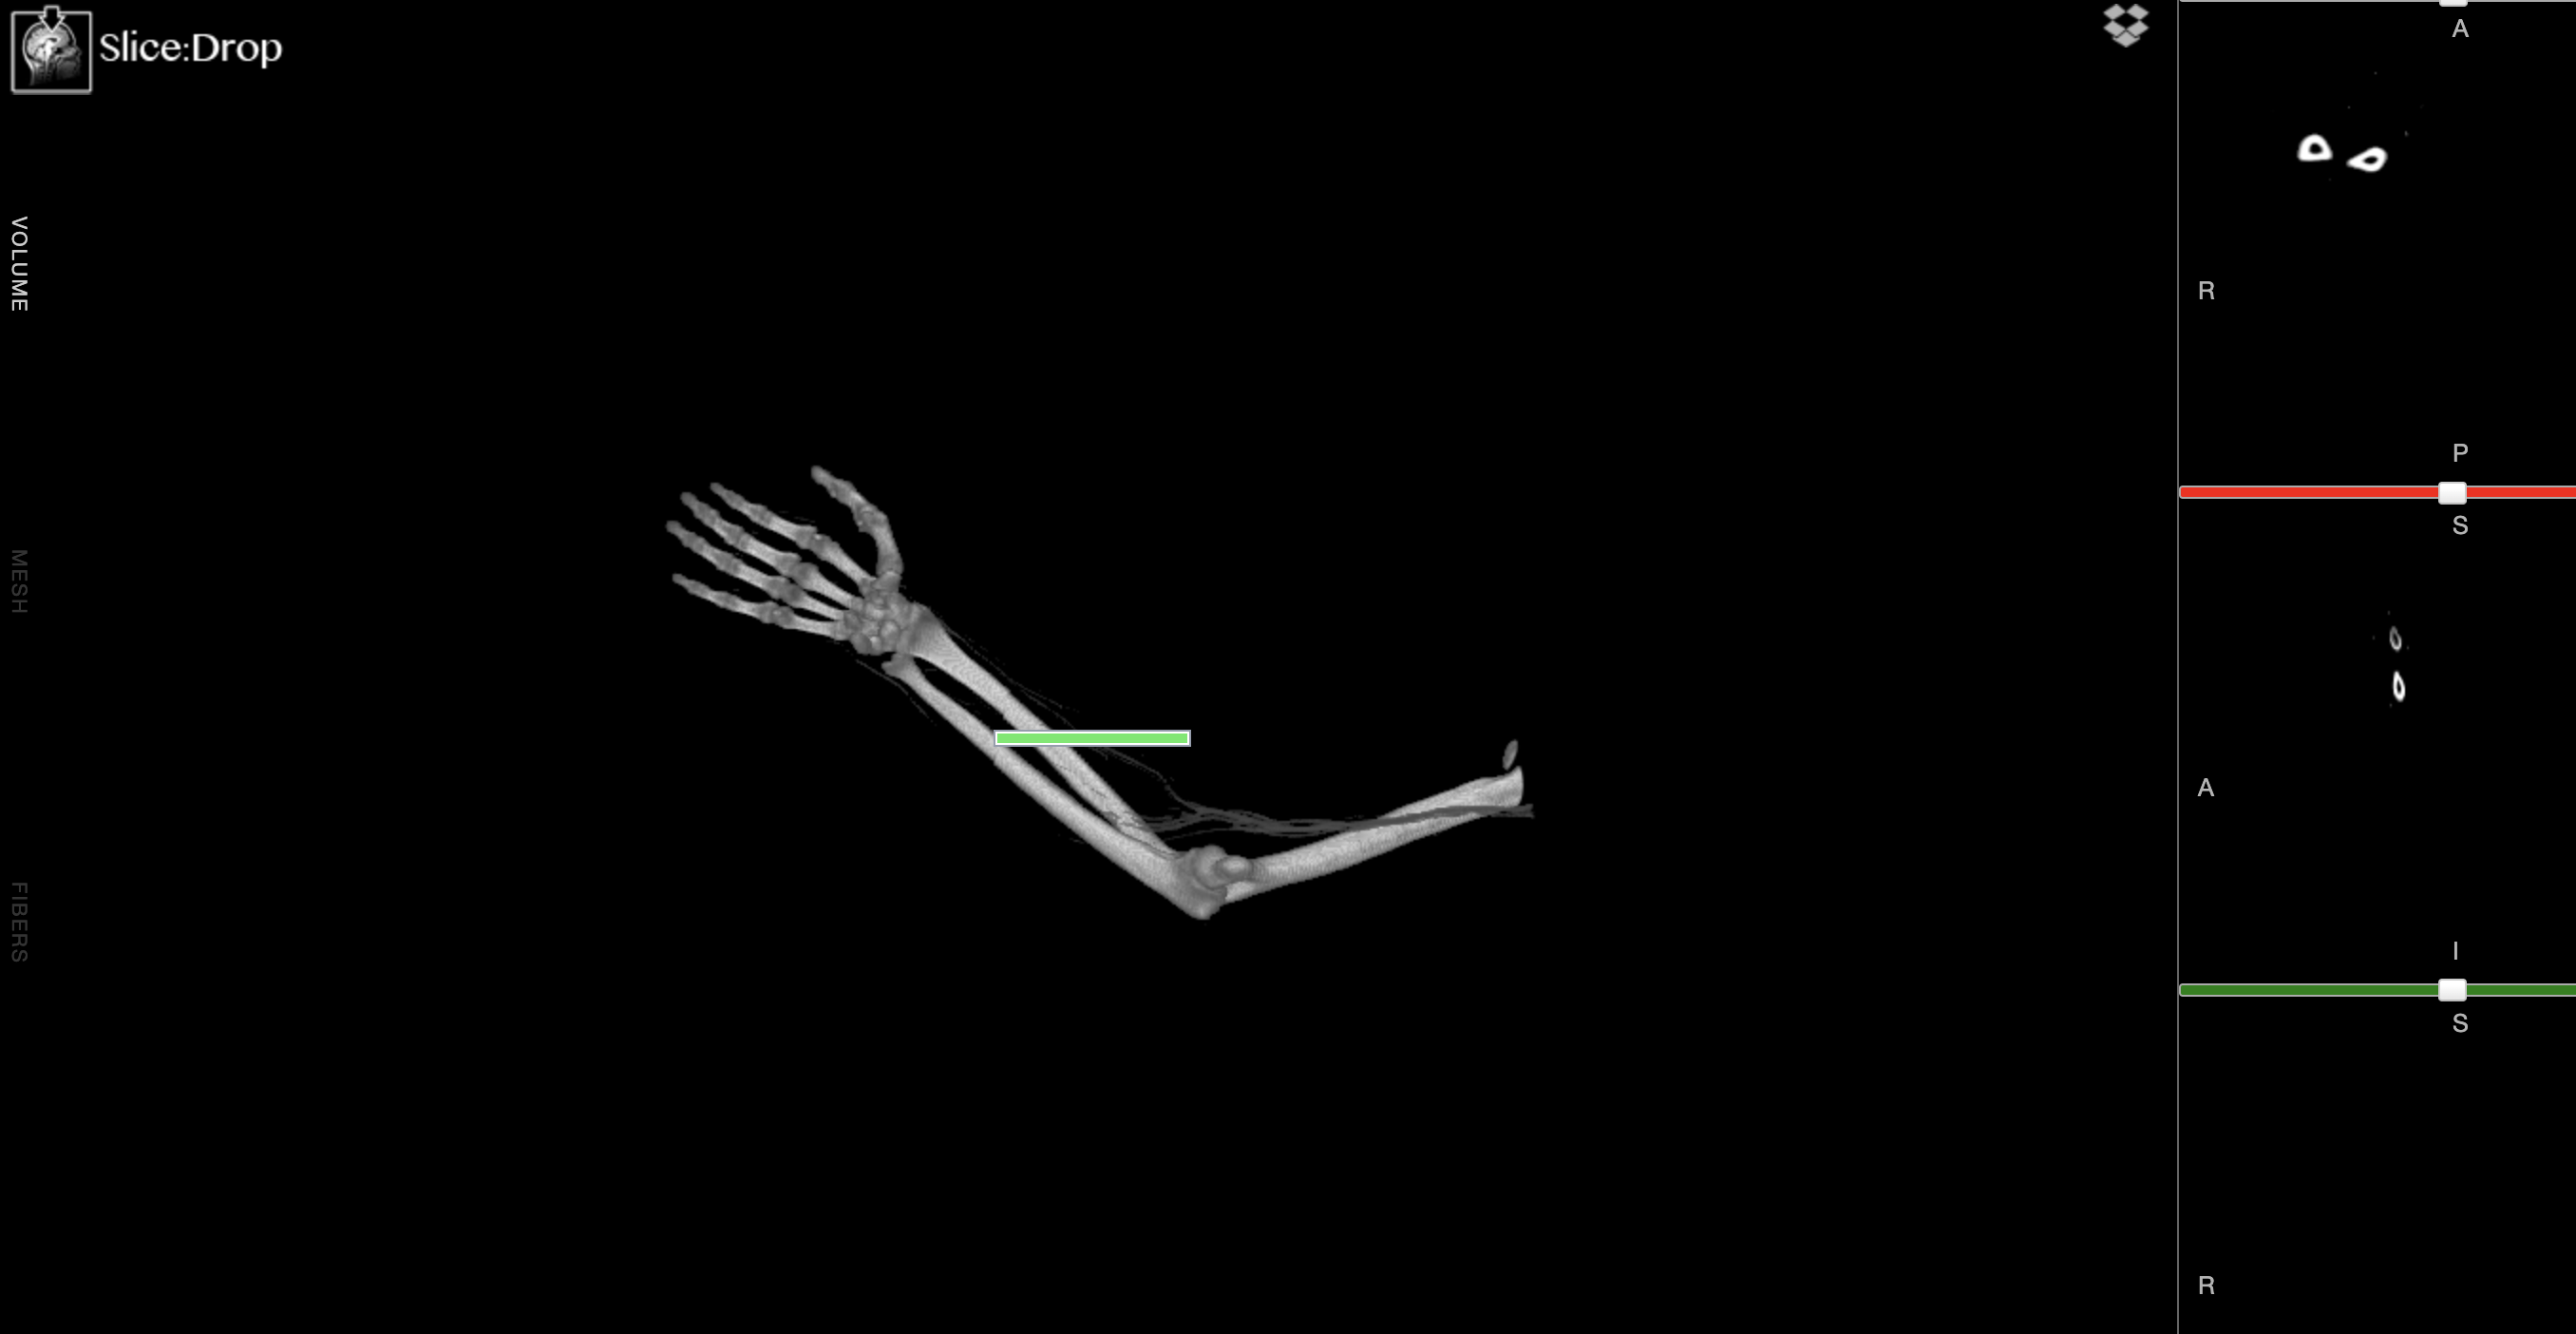

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [24]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [25]:
from pydicom import dcmread

In [26]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np
DIR="ct"
dcmfiles = os.listdir(DIR)
dcm_list = []
dcmfiles.sort()

for dcm_file in dcmfiles:
  df = dcmread(os.path.join(DIR, dcm_file))
  dcm_list.append(df)

array = []
for dcm in dcm_list:
  array.append(dcm.pixel_array)

numpy_3D_array = np.array(array)
print(np.shape(numpy_3D_array))

(220, 454, 512)


In [27]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

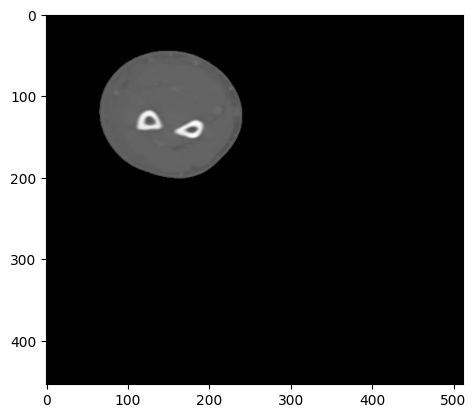

In [28]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
plt.imshow(numpy_3D_array[110,:,:],cmap='gray')

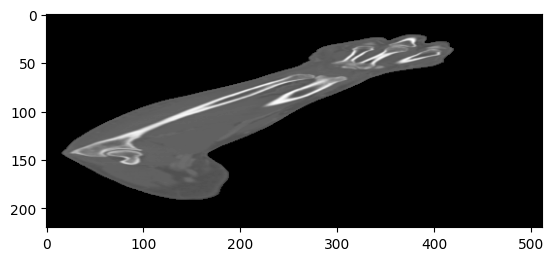

In [29]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(numpy_3D_array[:,120,:],cmap='gray')

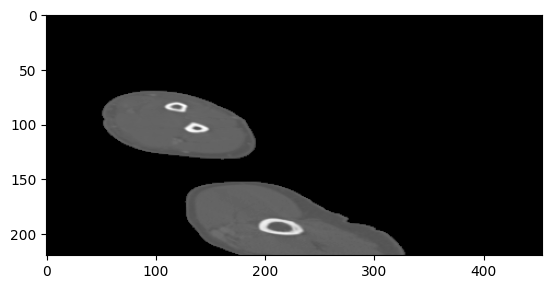

In [30]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(numpy_3D_array[:,:,200],cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [31]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [32]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center =  30
Window Width =  410
Rescale Intercept =  -1024


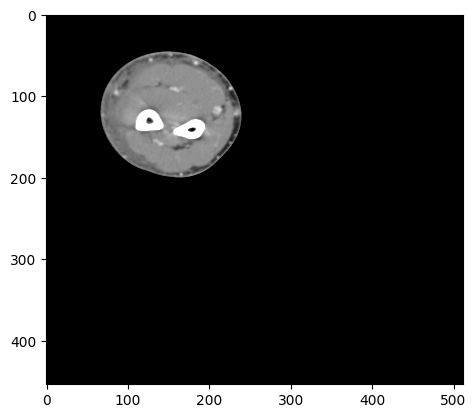

In [34]:
# TODO: YOUR CODE
level = dcm_list[0][(0x0028,0x1050)].value
print("Window Center = ",level)

window = dcm_list[0][(0x0028,0x1051)].value
print("Window Width = ",window)

rescale = dcm_list[0][(0x0028,0x1052)].value
print("Rescale Intercept = ",rescale)

vmin = level - window/2
vmax = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [35]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

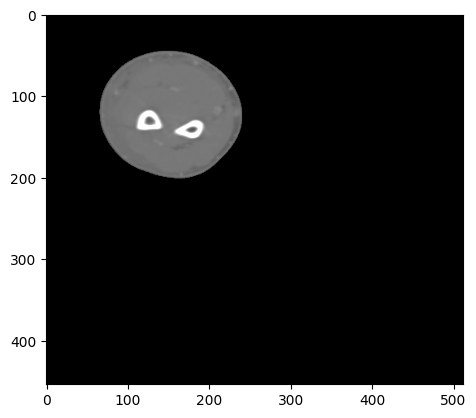

In [41]:
# TODO: YOUR CODE
window = 2000
level = 120

vmin = level - window/2
vmax = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

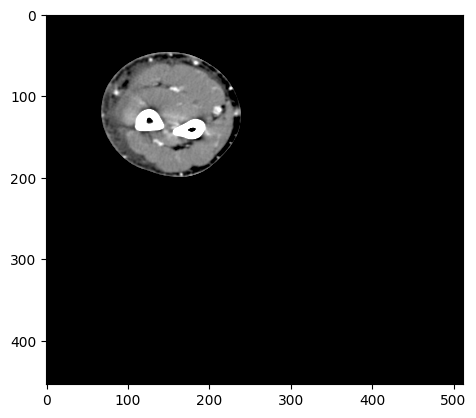

In [40]:
window = 200
level = 50

vmin = level - window/2
vmax = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

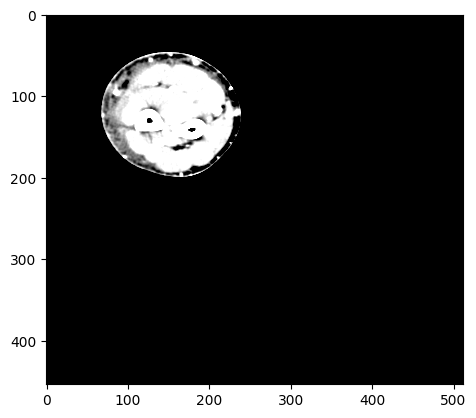

In [42]:
window = 80
level = 12

vmin = level - window/2
vmax = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [44]:
# Which values make sense and why?

In [43]:
# TODO: YOUR ANSWER
# It is meaningful to use window = 200 and level = 50.
# Adjusting window and level values helps enhance the contrast and brightness of medical images.
# Clear visibility is achieved with window = 200 and level = 50 compared to other settings.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

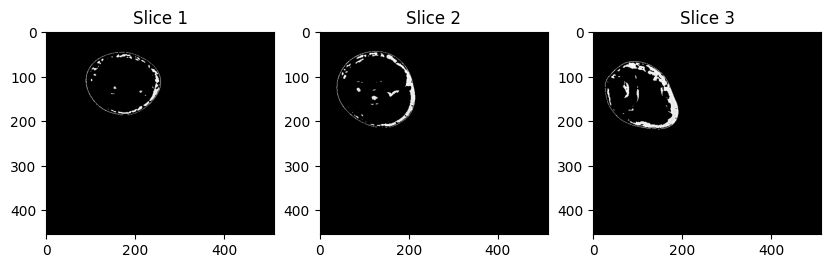

In [45]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range = (800, 1000)

fat_mask = np.zeros_like(numpy_3D_array, dtype=np.int16)
fat_mask = np.where(np.logical_or(numpy_3D_array < fat_range[0], numpy_3D_array > fat_range[1]), fat_mask, numpy_3D_array)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fat_mask[100 + i*25, :, :], cmap='gray')
    ax.set_title(f"Slice {i+1}")

plt.show()

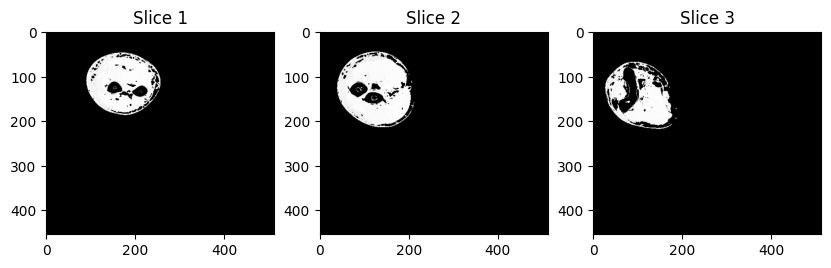

In [46]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_range = (1000, 1100)

soft_mask = np.zeros_like(numpy_3D_array, dtype=np.int16)
soft_mask = np.where(np.logical_or(numpy_3D_array < soft_range[0], numpy_3D_array > soft_range[1]), soft_mask, numpy_3D_array)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(soft_mask[100 + i*25, :, :], cmap='gray')
    ax.set_title(f"Slice {i+1}")

plt.show()

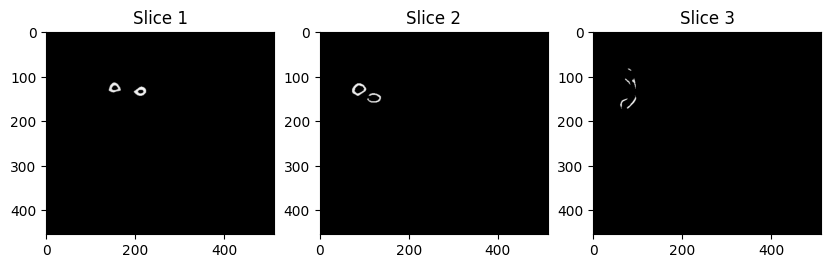

In [47]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_range = (2000, 2900)

bone_mask = np.zeros_like(numpy_3D_array, dtype=np.int16)
bone_mask = np.where(np.logical_or(numpy_3D_array < bone_range[0], numpy_3D_array > bone_range[1]), bone_mask, numpy_3D_array)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(bone_mask[100 + i*25, :, :], cmap='gray')
    ax.set_title(f"Slice {i+1}")

plt.show()

In [49]:
# Are the segmentations good?

In [48]:
# TODO: YOUR ANSWER
# YES

In [50]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""